In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

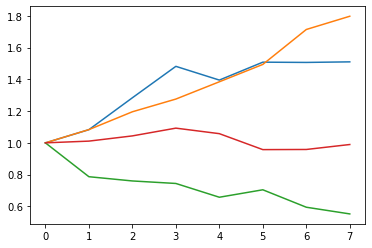

In [28]:
np.random.seed(0)
layers = 8
rand_lines = {f'rand_annotate_{l}':
    np.insert(
        np.random.lognormal(np.random.uniform(-.1, .1), np.random.uniform(0, .1), layer- 1)
    , 0, 1).cumprod() 
for l in range(4)}

for l in rand_lines.values():
    plt.plot(range(layers), l)
#Show random example lines

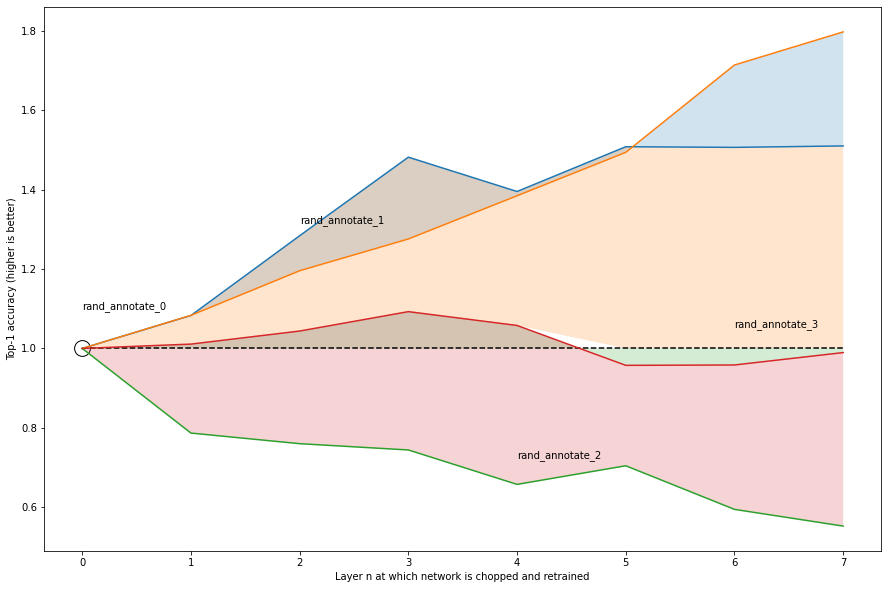

In [87]:
def cust_plt1(perf_dct, figsize= (15, 10)):
    # Perf_dct input is dictionary with desired annotation key and performance value array (corresponding to layer for now
    # but can be changed)
    plt.figure(figsize= figsize)
    #Pull relevant vars
    lines = len(perf_dct)
    layers = len(list(perf_dct.values())[0])
    baseline = list(perf_dct.values())[0][0]
    agg = [layers * [baseline]]
    #Basline dashed line
    plt.plot(agg[0], color= 'black', ls='--')
    #Baseline orig marker
    plt.scatter(0, baseline, s= 250,  marker= "o", color= 'white', edgecolors= 'black')
    #Plot base performance lines
    for n, (ann, val) in enumerate(perf_dct.items()):
        plt.plot(val)
        plt.text(n * layers // lines, 1.1 * val[n * layers // lines], ann)
        agg.append(val)
    #Apply shading between performance lines
    for idx, _ in sorted([(idx, val) for idx, val in enumerate(np.array(agg)[:, -1])], key= lambda x: -x[1]):
        other = np.array([x for idx_, x in enumerate(agg) if idx_ != idx]).max(axis= 0)
        plt.fill_between(range(layers), agg[idx], other, alpha= .2)
        agg[idx] = -np.inf * np.ones(layers)
    #Axis labeling
    plt.xlabel('Layer n at which network is chopped and retrained')
    plt.ylabel('Top-1 accuracy (higher is better)')

cust_plt1(rand_lines)